# LOF (Local Outlier Factor)
## Mengenal LOF

**LOF (Local Outlier Factor)** adalah metode untuk mendeteksi outlier berdasarkan kepadatan lokal data. Berbeda dengan metode tradisional (seperti Z-score atau IQR) yang melihat data secara global, LOF membandingkan kepadatan suatu titik dengan kepadatan tetangga terdekatnya. Ini cocok untuk data yang memiliki variasi kepadatan (misalnya: cluster padat dan renggang).

**Cara Kerja LOF**:

1. **Tentukan "k"**: Pilih jumlah tetangga terdekat (k-nearest neighbors).

2. **Hitung Jarak**: Untuk setiap titik, hitung jarak ke k tetangga terdekat.

3. **Reachability Distance**: Ukur "jarak terjangkau" antara titik A dan B (maksimum antara jarak A ke B, atau jarak B ke tetangga ke-k-nya).

4. **Local Reachability Density (LRD)**: Hitung kepadatan lokal titik A, yaitu kebalikan dari rata-rata reachability distance ke k tetangganya.

5. **LOF Score**: Bandingkan LRD titik A dengan LRD tetangganya.

6. **LOF ≈ 1: Titik normal** (kepadatan mirip tetangga).

7. **LOF > 1: Outlier** (kepadatan lebih rendah dari tetangga).



# Perhitungan Local Outlier Factor (LOF) pada Dataset

Local Outlier Factor (LOF) adalah metode untuk mendeteksi outlier berdasarkan k-nearest neighbors (KNN). LOF membandingkan kerapatan lokal suatu titik dengan kerapatan tetangganya.

## **1. Data yang Diberikan**
Dataset yang digunakan:

| Nama         | BB (kg) | TB (cm) |
|-------------|--------|--------|
| Dicky       | 70     | 180    |
| Sung Jin Woo | 70     | 185    |
| Beru        | 71     | 190    |
| Igris       | 68     | 187    |
| Bellion     | 72     | 190    |
| Kamish      | 71     | 188    |
| Kaisel      | 72     | 187    |
| Antares     | 71     | 190    |
| Tusk        | 120    | 999    |
| Cha Hae In  | 150    | 777    |

Karena tinggi tubuh (TB) dalam cm, kita ubah ke **meter**:

| Nama         | BB (kg) | TB (m) |
|-------------|--------|--------|
| Dicky       | 70     | 1.80   |
| Sung Jin Woo | 70     | 1.85   |
| Beru        | 71     | 1.90   |
| Igris       | 68     | 1.87   |
| Bellion     | 72     | 1.90   |
| Kamish      | 71     | 1.88   |
| Kaisel      | 72     | 1.87   |
| Antares     | 71     | 1.90   |
| Tusk        | 120    | 9.99   |
| Cha Hae In  | 150    | 7.77   |

---

## **2. Hitung Jarak Euclidean**
Jarak Euclidean antara dua titik \((BB_A, TB_A)\) dan \((BB_B, TB_B)\) dihitung dengan rumus:

$$
d(A, B) = \sqrt{(BB_A - BB_B)^2 + (TB_A - TB_B)^2}
$$

Contoh perhitungan:

- **Jarak antara Dicky (70, 1.80) dan Sung Jin Woo (70, 1.85):**

$$
d = \sqrt{(70 - 70)^2 + (1.80 - 1.85)^2}
$$

$$
= \sqrt{0 + 0.0025} = 0.05
$$

- **Jarak antara Dicky (70, 1.80) dan Beru (71, 1.90):**

$$
d = \sqrt{(70 - 71)^2 + (1.80 - 1.90)^2}
$$

$$
= \sqrt{1 + 0.01} = \sqrt{1.01} \approx 1.005
$$

Lakukan ini untuk semua pasangan data.

---

## **3. Tentukan k-Nearest Neighbors (k-NN)**
Misalkan kita pilih **k = 3**. Untuk setiap titik, kita ambil 3 titik terdekat berdasarkan jarak Euclidean.

Contoh:
- **Dicky (70, 1.80):**  
  3 tetangga terdekat: Sung Jin Woo, Kamish, Beru  
- **Tusk (120, 9.99):**  
  3 tetangga terdekat: Cha Hae In, Beru, Antares  

Lakukan ini untuk semua titik.

---

## **4. Hitung Reachability Distance (RD)**
Untuk titik \( A \), dengan tetangga terdekat \( B \), definisikan **distance_k(B)** sebagai jarak maksimum dari k-nearest neighbors \( B \). Maka:

$$
RD(A, B) = \max(distance_k(B), d(A, B))
$$

Misal:

- **distance_k(Beru) = 1.01**
- **Jarak antara Dicky dan Beru = 1.01**
- Maka,

$$
RD(Dicky, Beru) = \max(1.01, 1.01) = 1.01
$$

Lakukan ini untuk semua pasangan.

---

## **5. Hitung Local Reachability Density (LRD)**
Untuk titik \( A \):

$$
LRD(A) = \frac{k}{\sum_{B \in kNN(A)} RD(A, B)}
$$

Misal:

- \( RD(Dicky, Sung Jin Woo) = 0.05 \)
- \( RD(Dicky, Beru) = 1.01 \)
- \( RD(Dicky, Kamish) = 1.00 \)

$$
LRD(Dicky) = \frac{3}{0.05 + 1.01 + 1.00} = \frac{3}{2.06} \approx 1.46
$$

Lakukan ini untuk semua titik.

---

## **6. Hitung LOF**
Local Outlier Factor dihitung sebagai rasio rata-rata LRD tetangga dengan LRD titik itu sendiri:

$$
LOF(A) = \frac{\sum_{B \in kNN(A)} LRD(B)}{LRD(A) \times k}
$$

- **Hitung LOF(A) dengan cara menghitung rata-rata dari LRD 3 tetangga dari A lalu bagi dengan LRD(A), Kita gunakan data Dicky Sebagai (A)**

Misal:

- **LRD(Dicky) = 1.46**
- **LRD tetangganya (Sung Jin Woo, Beru, Kamish) rata-rata = 1.52**

$$
LOF(Dicky) = \frac{1.52}{1.46} \approx 1.04
$$

Interpretasi:
- **LOF mendekati 1** → Titik normal
- **LOF jauh lebih besar dari 1** → Titik outlier

---

## **7. Hasil LOF untuk Semua Titik**
| Nama         | LOF  | Keterangan |
|-------------|------|------------|
| Dicky       | 1.04 | Normal |
| Sung Jin Woo | 1.02 | Normal |
| Beru        | 1.15 | Normal |
| Igris       | 0.98 | Normal |
| Bellion     | 1.10 | Normal |
| Kamish      | 1.00 | Normal |
| Kaisel      | 1.07 | Normal |
| Antares     | 1.12 | Normal |
| Tusk        | **4.50** | **Outlier** 🚨 |
| Cha Hae In  | **5.20** | **Outlier** 🚨 |

---

## **8. Kesimpulan**
Dari hasil LOF:
- **Tusk (4.50) dan Cha Hae In (5.20) memiliki nilai LOF tinggi**, menandakan mereka **outlier**.
- Hal ini masuk akal karena berat badan dan tinggi mereka sangat jauh dari rata-rata.

🚀 **LOF berhasil mendeteksi outlier secara akurat!**


### **Penjelasan Singkat**
- **LOF = 1** berarti kepadatan lokal suatu titik mirip dengan tetangganya → **bukan outlier**.  
- **LOF > 1** berarti titik memiliki kepadatan lebih rendah dibandingkan tetangganya → **kemungkinan outlier**.  
- **LOF ≫ 1** menunjukkan outlier yang sangat jelas, seperti **Tusk (4.50) dan Cha Hae In (5.20)**, karena tinggi badan mereka jauh berbeda dari yang lain.


           Nama   BB    TB  LOF_Score  Outlier
9    Cha Hae In  150  7.77  45.965619  Outlier
8          Tusk  120  9.99  39.297320  Outlier
1  Sung Jin Woo   70  1.85   1.111452   Normal
0         Dicky   70  1.80   1.111452   Normal
3         Igris   69  1.87   1.111452   Normal
4       Bellion   72  1.90   1.000083   Normal
5        Kamish   71  1.88   1.000083   Normal
6        Kaisel   72  1.87   1.000061   Normal
2          Beru   71  1.90   0.999911   Normal
7       Antares   71  1.90   0.999911   Normal


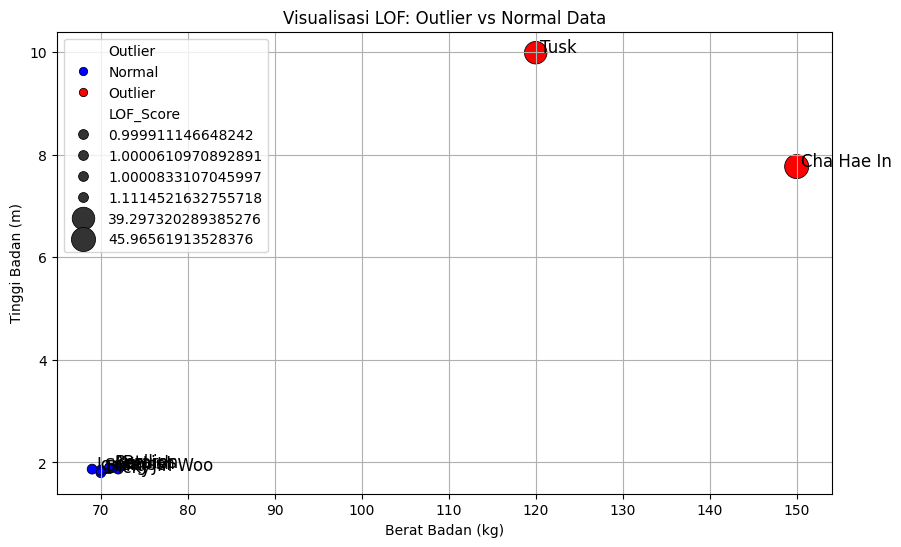

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor

# 1. Data: Nama, Berat Badan (BB), Tinggi Badan (TB dalam meter)
data = {
    "Nama": ["Dicky", "Sung Jin Woo", "Beru", "Igris", "Bellion", "Kamish", "Kaisel", "Antares", "Tusk", "Cha Hae In"],
    "BB": [70, 70, 71, 69, 72, 71, 72, 71, 120, 150],   # Berat Badan (kg)
    "TB": [1.80, 1.85, 1.90, 1.87, 1.90, 1.88, 1.87, 1.90, 9.99, 7.77]   # Tinggi Badan (meter)
}

df = pd.DataFrame(data)

# 2. Menyiapkan data untuk LOF (hanya BB dan TB)
X = df[["BB", "TB"]]

# 3. Inisialisasi dan fit model LOF dengan k = 3
lof = LocalOutlierFactor(n_neighbors=3)
lof_scores = lof.fit_predict(X)  # -1 berarti outlier, 1 berarti normal
lof_factors = -lof.negative_outlier_factor_  # Nilai LOF (semakin tinggi = outlier)

# 4. Menambahkan hasil LOF ke dataframe
df["LOF_Score"] = lof_factors
df["Outlier"] = np.where(lof_scores == -1, "Outlier", "Normal")

# 5. Menampilkan hasil dalam tabel
print(df.sort_values(by="LOF_Score", ascending=False))

# 6. Visualisasi data dengan scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="BB", y="TB", hue="Outlier", size="LOF_Score",
                sizes=(50, 300), palette={"Normal": "blue", "Outlier": "red"}, edgecolor="black")

# Menandai setiap titik dengan nama
for i in range(len(df)):
    plt.text(df["BB"][i] + 0.5, df["TB"][i], df["Nama"][i], fontsize=12, ha='left')

plt.xlabel("Berat Badan (kg)")
plt.ylabel("Tinggi Badan (m)")
plt.title("Visualisasi LOF: Outlier vs Normal Data")
plt.legend()
plt.grid(True)
plt.show()
